### Convert image to patches.


In [1]:
import os
from pyrsimg import readTiff
from pyrsimg import imgShow, imsShow
from pyrsimg import img2patch, crop, crop_scales
import matplotlib.pyplot as plt
import numpy as np


In [2]:
root_path = os.getcwd().split('pyrsimg')[0] + 'pyrsimg'
path_rsimg = root_path + '/docs/source/examples/data/l8_scene_05.tif'
path_truth = root_path + '/docs/source/examples/data/l8_scene_05_truth.tif'


#### Read the remote sensing image.

In [3]:
l8_img = readTiff(path_rsimg)
l8_truth = readTiff(path_truth)
l8_img.array.shape


Warning 1: PROJ: proj_create_from_database: SQLite error on SELECT name, type, coordinate_system_auth_name, coordinate_system_code, datum_auth_name, datum_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM geodetic_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name
Warning 1: PROJ: proj_create_from_database: SQLite error on SELECT name, ellipsoid_auth_name, ellipsoid_code, prime_meridian_auth_name, prime_meridian_code, area_of_use_auth_name, area_of_use_code, deprecated FROM geodetic_datum WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name
Warning 1: PROJ: proj_create_from_database: SQLite error on SELECT name, coordinate_system_auth_name, coordinate_system_code, geodetic_crs_auth_name, geodetic_crs_code, conversion_auth_name, conversion_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM projected_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name
Warning 1: 

Warning 1: PROJ: proj_create_from_database: SQLite error on SELECT name, type, coordinate_system_auth_name, coordinate_system_code, datum_auth_name, datum_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM geodetic_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name
Warning 1: PROJ: proj_create_from_database: SQLite error on SELECT name, ellipsoid_auth_name, ellipsoid_code, prime_meridian_auth_name, prime_meridian_code, area_of_use_auth_name, area_of_use_code, deprecated FROM geodetic_datum WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name
Warning 1: PROJ: proj_create_from_database: SQLite error on SELECT name, coordinate_system_auth_name, coordinate_system_code, geodetic_crs_auth_name, geodetic_crs_code, conversion_auth_name, conversion_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM projected_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name
Warning 1: 

(1410, 1690, 6)

#### Visualize the image.

Text(0.5, 1.0, 'groud truth')

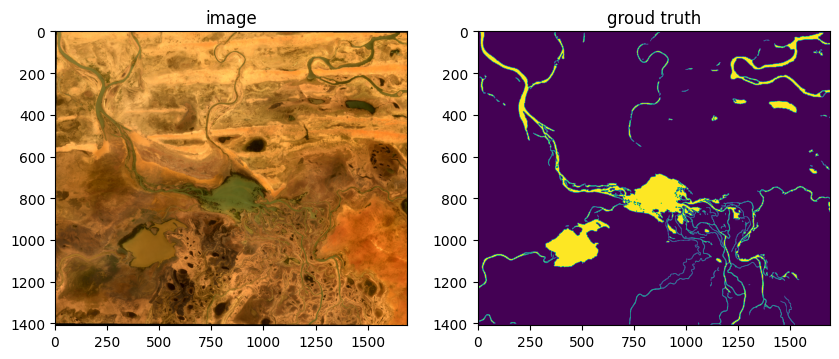

In [4]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
imgShow(l8_img.array, ax=ax[0])
ax[1].imshow(l8_truth.array)
ax[0].set_title('image')
ax[1].set_title('groud truth')


#### Convert image to multiscale patches.

In [5]:
imgPat_ins = img2patch(img=l8_img.array, patch_size=200, edge_overlay = 30)
patch_low_list = imgPat_ins.toPatch()
patch_high_list = imgPat_ins.higher_patch_crop(higher_patch_size=300)
print(len(patch_low_list), len(patch_high_list))

99 99


#### Check the cropped multiscale patches.

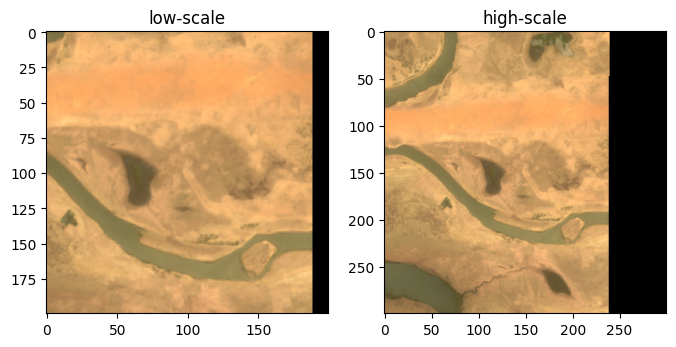

In [6]:
i_img = 20
fig, ax = plt.subplots(1,2,figsize=(8,4))
imsShow(img_list=[patch_low_list[i_img], patch_high_list[i_img]], \
                    img_name_list=['low-scale', 'high-scale'], clip_list=[2,2])


#### Randomly crop the image and truth image to patches.


In [7]:
### layer stacking for the image and truth image firstly.
truth = np.expand_dims(l8_truth.array, axis=-1)
img_truth = np.concatenate([l8_img.array, truth], axis=-1)


Text(0.5, 1.0, 'The cropped image truth')

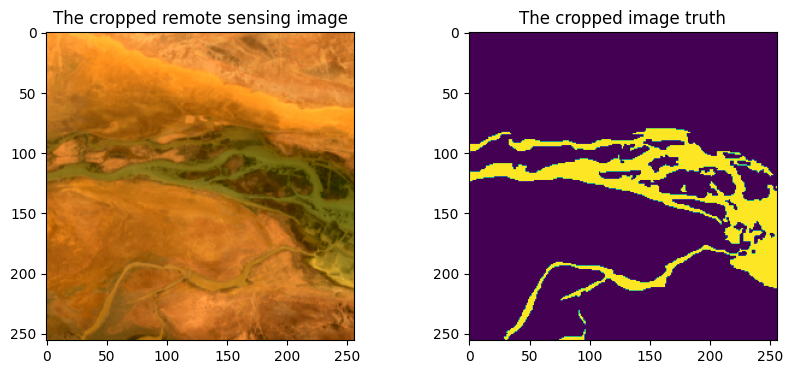

In [8]:
patch = crop(image=img_truth, size=(256,256))
fig, ax = plt.subplots(1,2,figsize=(10, 4))
imgShow(patch[:,:,0:-1], ax=ax[0])
ax[0].set_title('The cropped remote sensing image')
ax[1].imshow(patch[:,:,-1])
ax[1].set_title('The cropped image truth')

#### Randomly crop the image and truth image to multiscale patches.

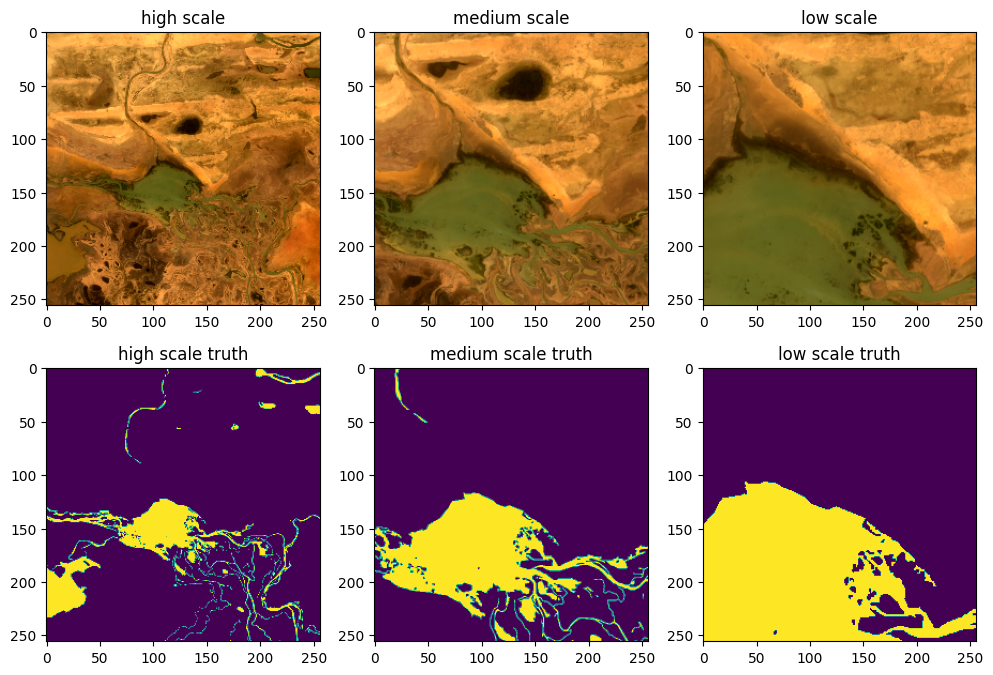

In [9]:
patches = crop_scales(image=img_truth, scales=(1024, 512, 256))
plt.figure(figsize=(12, 8))
patches_img = [patch[:,:,0:-1] for patch in patches]
patches_truth = [patch[:,:,-1] for patch in patches]
imsShow(img_list=patches_img+patches_truth,img_name_list=['high scale', 'medium scale', 'low scale', \
                                'high scale truth','medium scale truth','low scale truth'], clip_list=[2,2,2,0,0,0], row=2, col=3)

